# (First Derivative) Making our nxn matrix whose diagonals are -1 and first value afterwards is 1

In [3]:
def ones_matrix(dimension):
    """Used to make a matrix that when multiplied to a 1D array of values and divided by the length of the x-values
    will calculate the slope of each interval."""
    import numpy as np

    # Generate the 0 matrix as our starting point
    matrix = np.zeros((dimension,dimension))

    
    

    # Loop to cycle through every single value in the matrix
    for row in range(dimension):
        for column in range(dimension):
        
        # If the row and column have the same values, then we are at a diagonal
            if row - column == 0:
                matrix[row][column] = -1
        
        # If column value is 1 higher than row value, then we are at a value following the diagonal.
            elif column - row == 1:
                matrix[row][column] = 1

                
                
      
    return matrix

# (Second Derivative) Making an nxn matrix whose diagonals are -2 and adjacent values are 1

In [4]:
def twos_matrix(dimension):
    """Used to make a matrix that when multiplied to a 1D array of values and divided by the
    length of the x-values will calculate the array of second derivative outputs"""
    import numpy as np
    
    # Generate a zero-matrix as our starting point
    matrix = np.zeros((dimension , dimension))
    
    
    
    
    # Run a loop to go through every value in the matrix
    for row in range(dimension):
        for column in range(dimension):
        
            # If the row and column have the same values, then we are at a diagonal
            if row - column == 0:
                matrix[row][column] = -2
        
            # If their difference is 1, then we are at a value touching the diagonal.
            elif abs(row - column) == 1:
                matrix[row][column] = 1
    
    
    
    
    # Return the generated matrix
    return matrix

# Approximating the derivative numerically using Linear Algebra
# f(x) = x^4+5x^2+x

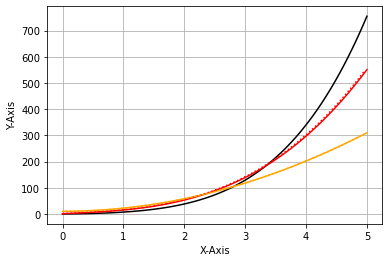

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define our initial function and our known exact derivative of it
def func(x):
    """Takes an array of input values and returns an array of the output values when
    plugged into a desired function."""
    return x ** 4 + 5 * x ** 2 + x

def exact_deriv(x):
    """Similar as the above user-defined function, except the exact derivative of the
    starting function is used instead."""
    return 4 * x ** 3 + 10 * x + 1

def exact_deriv2(x):
    """Calculates the second derivative of inputs."""
    return 12 * x ** 2 + 10




# Define our input x-values and other variables
# Define our max and min input value
x_min = 0
x_max = 5

# n will divide our range into distinct x-values
interv_num = 100
x_val = np.linspace(x_min, x_max, interv_num+1)

# h will be relevant when estimating the derivative
interv_width = (x_max - x_min) / interv_num




# Defining and plotting our y-values and exact derivative values
y_val = func(x_val)
plt.plot(x_val, y_val, color="black")

deriv_1_val = exact_deriv(x_val)
plt.plot(x_val, deriv_1_val, color="red")

deriv_2_val = exact_deriv2(x_val)
plt.plot(x_val, deriv_2_val, color="orange")



# Approximating our FIRST derivative values 
# Generate our first derivative matrix D1, and trim off the last row since it produces an outlier
Dmat_1 = ones_matrix(interv_num+1)
Dmat_1 = Dmat_1[:-1]

# Multiply D1 and our y-values vector and divide by width of interv_width to approximation y-prime
yp_val = np.matmul(Dmat_1 , y_val) / interv_width

# Trim off the last x-value row to ensure it can be plotted, then plot
xp_val = x_val[:-1]
plt.plot(xp_val, yp_val, color="red", linestyle="dotted")




# Approximating our SECOND derivative values
# Generate our second derivative matrix D2, and trim off the first and last rows since those produce outliers
Dmat_2 = twos_matrix(interv_num+1)
Dmat_2 = Dmat_2[1:-1]

# Multiply D2 and our y-values vector and divide by 2*width of interv_width to approximation y-prime
ypp_val = np.matmul(Dmat_2 , y_val) / (interv_width ** 2)


# Trim off the first and last x-value rows to ensure it can be plotted, then plot
xpp_val = x_val[1:-1]
plt.plot(xpp_val, ypp_val, color="orange", linestyle="dotted")




# Set up our cosmetic expectations for our plot and display the graph
plt.grid()
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.show()